COVID19 Crisis
=======

Copyright 2020. Kiarash Kiani.
* **Home Page:**    http://kiarash.info
* **Email:**        hi@kiarash.info
* **GitHub:**       github.com/kkiani

## Introduction
Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The disease was first identified in 2019 in Wuhan, China, and has since spread globally, resulting in the 2019–20 coronavirus pandemic. According to the World Health Organization (WHO), the most common symptoms are fever, tiredness, and dry cough.

[Read more on Wikipedia](https://en.wikipedia.org/wiki/Coronavirus_disease_2019)

## Dataset
This dataset provided by [Our World in Data](https://ourworldindata.org/coronavirus-source-data) website. In the first steps we do some basic Pandas manipulation inorder to get know the nature of our data better.

<span style="background-color: red;">*ATTENTION: This notebook created by the time that dataset has only recoreds until 15 march 2020.*</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

In [2]:
total_cases_path = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
total_deaths_path = 'https://covid.ourworldindata.org/data/ecdc/total_deaths.csv'
new_cases_path = 'https://covid.ourworldindata.org/data/ecdc/new_cases.csv'

df = pd.read_csv(total_cases_path)

List of countries

In [ ]:
df.columns.values

### Most Affected Countries

In [3]:
last_row  = df.tail(1).copy()
last_row.drop(['World', 'date'], axis=1, inplace=True)

last_row = last_row.T
last_row.reset_index()
last_row.columns = ['total cases']

In [4]:
last_row.sort_values(['total cases'], ascending=False).head(5)

,total cases
United States,245540.0
Italy,115242.0
Spain,110238.0
China,82465.0
Germany,73522.0


### Less Affected Countries

In [5]:
last_row.sort_values(['total cases'], ascending=False).tail(5)

,total cases
Saint Vincent and the Grenadines,2.0
Papua New Guinea,1.0
Timor,1.0
International,NaN
Saint Barthlemy,NaN


### Days we pass

In [6]:
months = df.shape[0]//30
days = df.shape[0]%30

print(f'{months} months and {days} days. {df.shape[0]} days in total.')

3 months and 5 days. 95 days in total.


### Ploting data

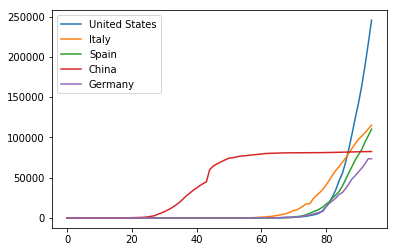

In [7]:
most_affected_countries = last_row.sort_values(['total cases'], ascending=False).head(5).index.values

for country_name in most_affected_countries:
    country_data = df[country_name].fillna(0).values
    plt.plot(country_data, label=country_name)

plt.legend()
plt.show()

Let plot data for Iran

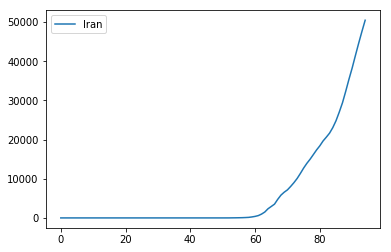

In [8]:
iran = df['Iran'].fillna(0).values

plt.plot(iran, label='Iran')
plt.legend()
plt.show()

## Modeling

Exponential and Logistic model is widely use to represent the growing behrvior of COVID19. While the Exponential model can represent how it begin to spread, the virus is going to stop spreading more even if everyone affected in some point which logistic model can shows this behavior too. 

### Exponential Model

In [9]:
def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))

In [10]:
target_y = df[df['Iran'] != 0]['Iran'].values
x = np.arange(len(target_y))

In [11]:
exp_fit = curve_fit(exponential_model, x, target_y, p0=[1,1,1])

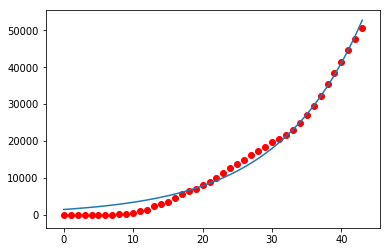

In [12]:
optimum_a = exp_fit[0][0]
optimum_b = exp_fit[0][1]
optimum_c = exp_fit[0][2]

y = exponential_model(x, optimum_a, optimum_b, optimum_c)

plt.plot(x, y)
plt.scatter(x, target_y, c='r')
plt.show()

In [ ]:
x = np.arange(99)
y = exponential_model(x, optimum_a, optimum_b, optimum_c)
plt.plot(x, y)
plt.show()

### Logistic Model

In [ ]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [ ]:
logistic_fit = curve_fit(logistic_model, x, target_y, p0=[2,100,20000])

In [ ]:
optimum_a = logistic_fit[0][0]
optimum_b = logistic_fit[0][1]
optimum_c = logistic_fit[0][2]

y = logistic_model(x, optimum_a, optimum_b, optimum_c)

plt.plot(x, y)
plt.scatter(x, target_y, c='r')
plt.show()

### LSTM Model

In [43]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

In [49]:
look_back = 1

In [15]:
def generate_dataset(data: np.array, look_back=1):
    x = []
    y = []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i+look_back)]
        x.append(a)
        y.append(data[i+look_back])
        
    return np.array(x), np.array(y)

In [50]:
a, b = generate_dataset(target_y, look_back)
a = a.reshape(a.shape[0], a.shape[1], 1)
a.shape

(42, 1, 1)

In [23]:
b

array([   18,    28,    43,    61,    95,   139,   245,   388,   593,
         978,  1501,  2336,  2922,  3513,  4747,  5823,  6566,  7161,
        8042,  9000, 10075, 11364, 12729, 13938, 14991, 16169, 17361,
       18407, 19644, 20610, 21638, 23049, 24811, 27017, 29406, 32332,
       35408, 38309, 41495, 44606, 47593])

In [51]:
model = Sequential()

model.add(LSTM(4, input_shape=(look_back, 1), return_sequences=True))
model.add(LSTM(2))
model.add(Dense(1))


opt = Adam(learning_rate=0.1)

model.compile(optimizer=opt, loss='mse')
history = model.fit(a, b, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 5s - loss: 376164629.8167
Epoch 2/100
 - 0s - loss: 375951688.7897
Epoch 3/100
 - 0s - loss: 375744097.9369
Epoch 4/100
 - 0s - loss: 375924959.0340
Epoch 5/100
 - 0s - loss: 375917177.4269
Epoch 6/100
 - 0s - loss: 375835547.1489
Epoch 7/100
 - 0s - loss: 375754363.3634
Epoch 8/100
 - 0s - loss: 375674743.0431
Epoch 9/100
 - 0s - loss: 375591481.4955
Epoch 10/100
 - 0s - loss: 375511114.6494
Epoch 11/100
 - 0s - loss: 375330371.3253
Epoch 12/100
 - 0s - loss: 375036846.5474
Epoch 13/100
 - 0s - loss: 374855422.4713
Epoch 14/100
 - 0s - loss: 374678901.6348
Epoch 15/100
 - 0s - loss: 374509150.8620
Epoch 16/100
 - 0s - loss: 374343713.3361
Epoch 17/100
 - 0s - loss: 374180098.6486
Epoch 18/100
 - 0s - loss: 374020076.7813
Epoch 19/100
 - 0s - loss: 373860608.5699
Epoch 20/100
 - 0s - loss: 373710005.1230
Epoch 21/100
 - 1s - loss: 373552113.3468
Epoch 22/100
 - 0s - loss: 373399193.2899
Epoch 23/100
 - 0s - loss: 373248381.1834
Epoch 24/100
 - 0s - loss: 373094750.1505
E

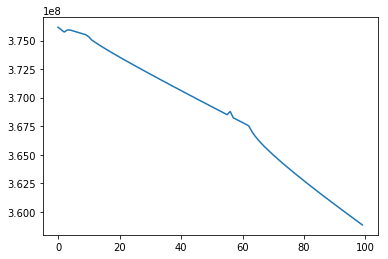

In [52]:
# history.history

plt.plot(history.history['loss'])
plt.show()

In [ ]:
# model.predict()
a[-1:]

In [ ]:
model.predict(a[-1:])